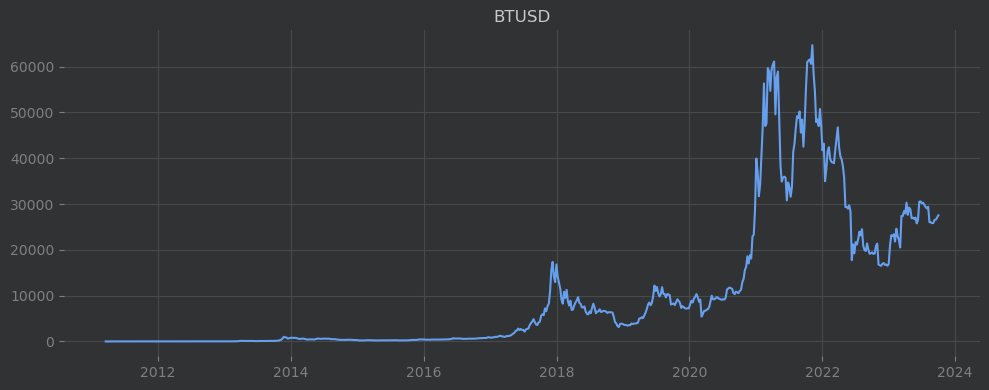

In [2]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cycler


def setting_plt():
    colors = cycler('color',
                    ['#669FEE', '#66EE91', '#9988DD',
                    '#EECC55', '#88BB44', '#FFBBBB'])
    plt.rc('figure', facecolor='#313233')
    plt.rc('axes', facecolor="#313233", edgecolor='none',
        axisbelow=True, grid=True, prop_cycle=colors,
        labelcolor='gray')
    plt.rc('grid', color='474A4A', linestyle='solid')
    plt.rc('xtick', color='gray')
    plt.rc('ytick', direction='out', color='gray')
    plt.rc('legend', facecolor="#313233", edgecolor="#313233")
    plt.rc("text", color="#C9C9C9")
    plt.rc('figure', facecolor='#313233')


def get_rates(symbol, number_of_data = 10000, timeframe=mt5.TIMEFRAME_M5):
    
    # Compute now date
    from_date = datetime.now()
    # Extract n Ticks before now
    rates = mt5.copy_rates_from(symbol, timeframe, from_date, number_of_data)
    # Transform Tuple into a DataFrame
    df_rates = pd.DataFrame(rates)
    # Convert number format of the date into date format
    df_rates["time"] = pd.to_datetime(df_rates["time"], unit="s")
    df_rates = df_rates.set_index("time")
    return df_rates

def PlotCloseData(dataframe):
    plt.figure(figsize = (10,4))
    plt.plot(dataframe.close)
    #plt.grid(False)
    plt.title("BTUSD")
    plt.tight_layout()
    plt.show()
    
if __name__ == '__main__':
    mt5.initialize()
    setting_plt()
    df = get_rates("BTCUSD", timeframe= mt5.TIMEFRAME_W1)
    PlotCloseData(df)